# Customer Segmentation using K-Means Clustering


#### Segmenting superstoreCustomers and Recommend Potential New Products or Services for each Segment ||

# Importing Dataset from kaggle

In [208]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download")

Skipping, found downloaded files in "./superstore-dataset-final" (use force=True to force download)


## **Objective 1: Preparing the Data for Modeling**

Our First Objective is to Prepare the Data for Modeling by Selecting a Subset of Fields, making sure they are Numeric, looking at their Distributions, and Engineering a new feature.

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
superstore_data=pd.read_csv("/content/superstore-dataset-final/Sample - Superstore.csv",encoding='latin1')

### Exploratory Data Analysis and cleaning

In [211]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [212]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Converting Order Date and Ship Date to datetime.

In [213]:
superstore_data["Order Date"]=pd.to_datetime(superstore_data["Order Date"])
superstore_data["Ship Date"]=pd.to_datetime(superstore_data["Ship Date"])

In [214]:
superstore_data.describe(include='number').round()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0
mean,4998.0,55190.0,230.0,4.0,0.0,29.0
std,2885.0,32064.0,623.0,2.0,0.0,234.0
min,1.0,1040.0,0.0,1.0,0.0,-6600.0
25%,2499.0,23223.0,17.0,2.0,0.0,2.0
50%,4998.0,56430.0,54.0,3.0,0.0,9.0
75%,7496.0,90008.0,210.0,5.0,0.0,29.0
max,9994.0,99301.0,22638.0,14.0,1.0,8400.0


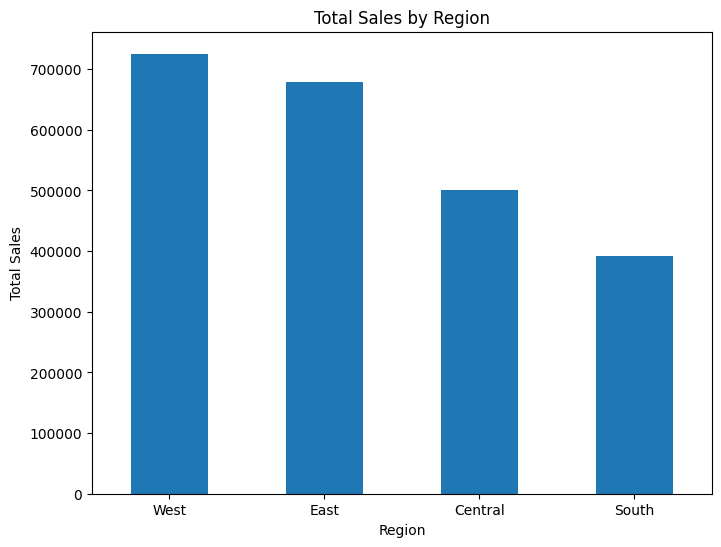

In [215]:
region_sales = superstore_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

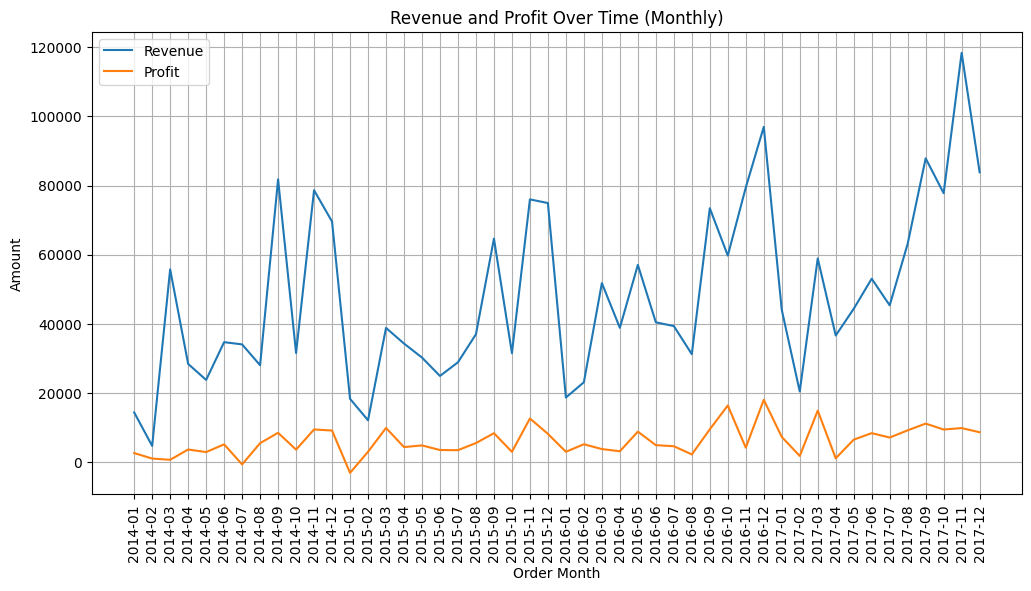

In [216]:
time_series_data = superstore_data.groupby(superstore_data['Order Date'].dt.to_period('M'))[['Sales', 'Profit']].sum()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index.astype(str), time_series_data['Sales'], label='Revenue')
plt.plot(time_series_data.index.astype(str), time_series_data['Profit'], label='Profit')
plt.title('Revenue and Profit Over Time (Monthly)')
plt.xlabel('Order Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

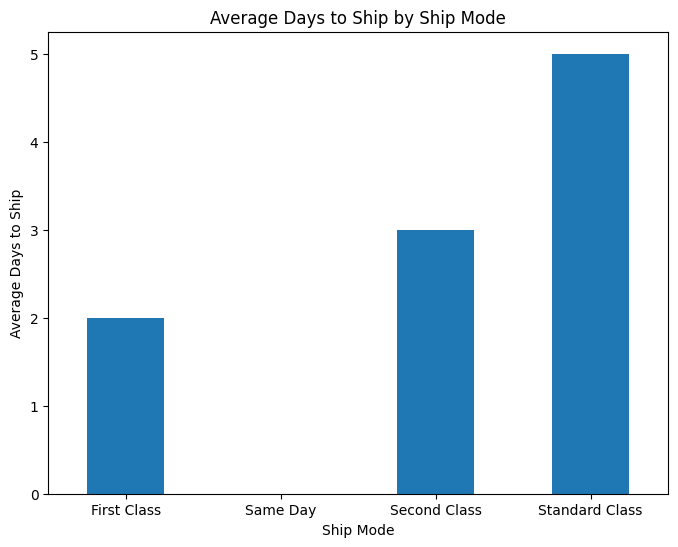

In [246]:
average_shipping_time = superstore_data.groupby('Ship Mode')['Ship Date'].apply(lambda x: (x - superstore_data.loc[x.index, 'Order Date']).mean().days)

plt.figure(figsize=(8, 6))
average_shipping_time.plot(kind='bar')
plt.title('Average Days to Ship by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Days to Ship')
plt.xticks(rotation=0)
plt.show()

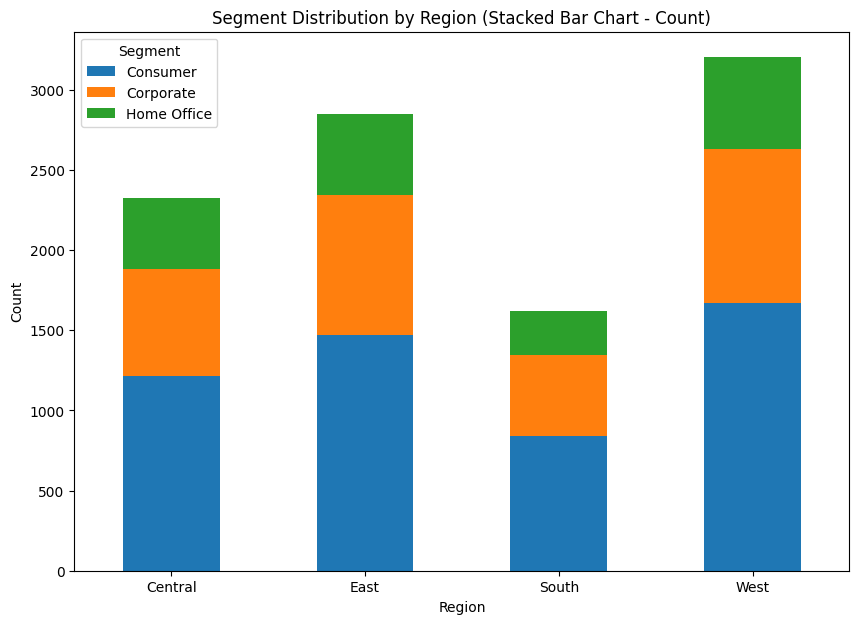

In [218]:
segment_region_counts = superstore_data.groupby("Region")["Segment"].value_counts().unstack()

segment_region_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Segment Distribution by Region (Stacked Bar Chart - Count)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Segment')
plt.show()

In [219]:
superstore_data.shape

(9994, 21)

In [220]:
data_subset=superstore_data.drop(["Row ID","Order ID","Customer ID","Postal Code","Product ID","Customer Name","Sub-Category","Product Name"],axis=1)

In [221]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
 2   Ship Mode   9994 non-null   object        
 3   Segment     9994 non-null   object        
 4   Country     9994 non-null   object        
 5   City        9994 non-null   object        
 6   State       9994 non-null   object        
 7   Region      9994 non-null   object        
 8   Category    9994 non-null   object        
 9   Sales       9994 non-null   float64       
 10  Quantity    9994 non-null   int64         
 11  Discount    9994 non-null   float64       
 12  Profit      9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 1015.1+ KB


In [222]:
data_subset.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,22.3680,2,0.20,2.5164


In [223]:
clean_data=data_subset.copy()

### Let's Engineer some Feature

In [224]:
clean_data['order year']=clean_data["Order Date"].dt.year
clean_data['order month']=clean_data["Order Date"].dt.month
clean_data['dayofweek']=clean_data["Order Date"].dt.dayofweek
clean_data['dalivery time']=(clean_data["Ship Date"]-clean_data["Order Date"]).dt.days
clean_data["price"]=clean_data["Sales"]/clean_data["Quantity"]
clean_data["cost"]=clean_data["Sales"]-clean_data["Profit"]
clean_data["per_quantity_profit"]=clean_data["Profit"]/clean_data["Quantity"]
clean_data["weekends"]=np.where(clean_data["dayofweek"]>=5,1,0)
clean_data.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sales,...,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,per_quantity_profit,weekends
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,261.9600,...,0.00,41.9136,2016,11,1,3,130.9800,220.0464,20.9568,0
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,731.9400,...,0.00,219.5820,2016,11,1,3,243.9800,512.3580,73.1940,0
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,14.6200,...,0.00,6.8714,2016,6,6,4,7.3100,7.7486,3.4357,1
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,957.5775,...,0.45,-383.0310,2015,10,6,7,191.5155,1340.6085,-76.6062,1
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,22.3680,...,0.20,2.5164,2015,10,6,7,11.1840,19.8516,1.2582,1


In [225]:
clean_data.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sales,...,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,per_quantity_profit,weekends
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,261.9600,...,0.00,41.9136,2016,11,1,3,130.9800,220.0464,20.9568,0
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,731.9400,...,0.00,219.5820,2016,11,1,3,243.9800,512.3580,73.1940,0
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,14.6200,...,0.00,6.8714,2016,6,6,4,7.3100,7.7486,3.4357,1
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,957.5775,...,0.45,-383.0310,2015,10,6,7,191.5155,1340.6085,-76.6062,1
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,22.3680,...,0.20,2.5164,2015,10,6,7,11.1840,19.8516,1.2582,1


In [226]:
clean_data=clean_data.drop(["Order Date","Ship Date","City","State","Country"],axis=1)

In [227]:
clean_data.describe(include="object")

,Ship Mode,Segment,Region,Category
count,9994,9994,9994,9994
unique,4,3,4,3
top,Standard Class,Consumer,West,Office Supplies
freq,5968,5191,3203,6026


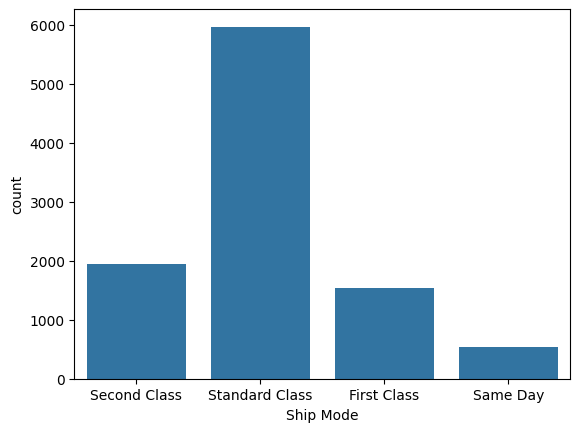

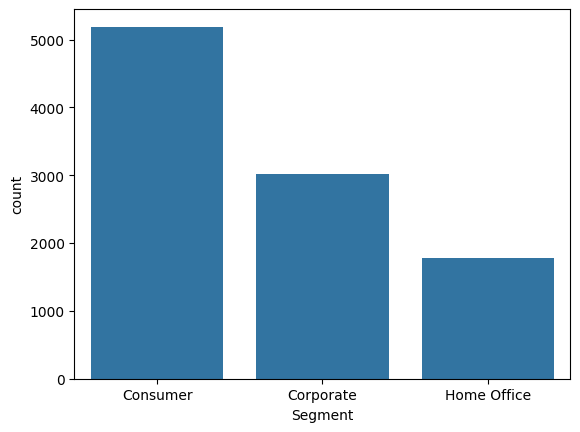

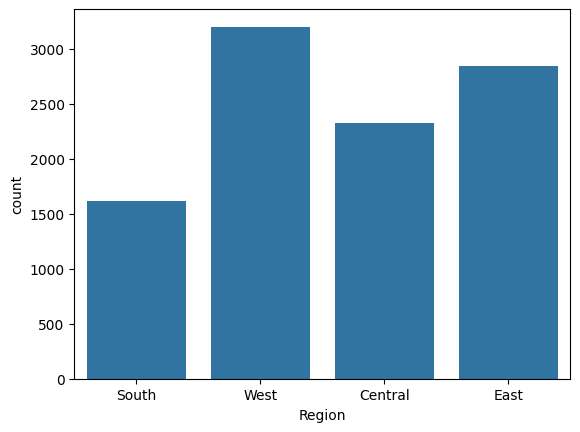

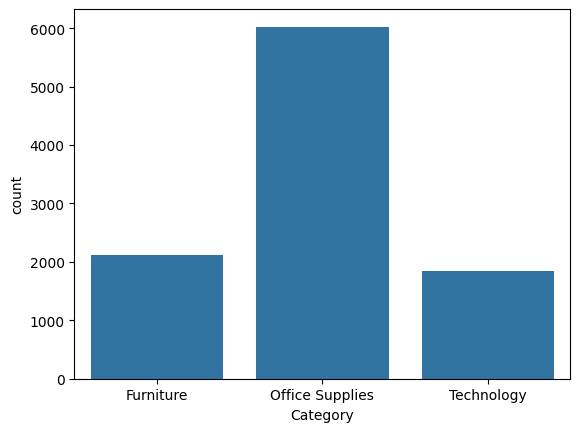

In [228]:
for col in clean_data.select_dtypes(include="object").columns:
  sns.countplot(x=col,data=clean_data)
  plt.show()

### Making Text Fields Numeric

In [229]:
numberdata = pd.get_dummies(clean_data, columns = ["Ship Mode","Segment","Region","Category"], dtype = 'int', prefix = '', prefix_sep = '')
numberdata.head()

,Sales,Quantity,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,...,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
0,261.9600,2,0.00,41.9136,2016,11,1,3,130.9800,220.0464,...,1,0,0,0,0,1,0,1,0,0
1,731.9400,3,0.00,219.5820,2016,11,1,3,243.9800,512.3580,...,1,0,0,0,0,1,0,1,0,0
2,14.6200,2,0.00,6.8714,2016,6,6,4,7.3100,7.7486,...,0,1,0,0,0,0,1,0,1,0
3,957.5775,5,0.45,-383.0310,2015,10,6,7,191.5155,1340.6085,...,1,0,0,0,0,1,0,1,0,0
4,22.3680,2,0.20,2.5164,2015,10,6,7,11.1840,19.8516,...,1,0,0,0,0,1,0,0,1,0


In [230]:
numberdata.describe().round()

,Sales,Quantity,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,...,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
count,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,...,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0
mean,230.0,4.0,0.0,29.0,2016.0,8.0,3.0,4.0,61.0,201.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,623.0,2.0,0.0,234.0,1.0,3.0,2.0,2.0,143.0,551.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1.0,0.0,-6600.0,2014.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0,2.0,0.0,2.0,2015.0,5.0,1.0,3.0,5.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,54.0,3.0,0.0,9.0,2016.0,9.0,4.0,4.0,16.0,42.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,210.0,5.0,0.0,29.0,2017.0,11.0,5.0,5.0,64.0,182.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
max,22638.0,14.0,1.0,8400.0,2017.0,12.0,6.0,7.0,3773.0,24450.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Objective 2: Cluster the Customers


### Scale the Data using Stardardization

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numberdata), columns = numberdata.columns)
df_scaled.head()

,Sales,Quantity,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,...,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
0,0.051510,-0.804303,-0.756643,0.056593,0.247234,0.971327,-1.039337,-0.548318,0.490206,0.034214,...,0.961902,-0.658055,-0.465991,-0.550299,-0.631304,2.273573,-0.686770,1.926637,-1.232335,-0.47614
1,0.805633,-0.354865,-0.756643,0.815054,0.247234,0.971327,-1.039337,-0.548318,1.280857,0.564906,...,0.961902,-0.658055,-0.465991,-0.550299,-0.631304,2.273573,-0.686770,1.926637,-1.232335,-0.47614
2,-0.345368,-0.804303,-0.756643,-0.093002,0.247234,-0.550979,1.316022,0.023935,-0.375101,-0.351213,...,-1.039607,1.519629,-0.465991,-0.550299,-0.631304,-0.439836,1.456091,-0.519039,0.811468,-0.47614
3,1.167688,0.544012,1.423149,-1.757484,-0.642843,0.666866,1.316022,1.740693,0.913768,2.068596,...,0.961902,-0.658055,-0.465991,-0.550299,-0.631304,2.273573,-0.686770,1.926637,-1.232335,-0.47614
4,-0.332935,-0.804303,0.212153,-0.111593,-0.642843,0.666866,1.316022,1.740693,-0.347995,-0.329240,...,0.961902,-0.658055,-0.465991,-0.550299,-0.631304,2.273573,-0.686770,-0.519039,0.811468,-0.47614


In [232]:
df_scaled.describe().round()

,Sales,Quantity,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,...,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
count,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,...,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0
mean,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.0,-1.0,-1.0,-28.0,-2.0,-2.0,-2.0,-2.0,-0.0,-0.0,...,-1.0,-1.0,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0
25%,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,...,-1.0,-1.0,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0
50%,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,1.0,-1.0,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,1.0,-0.0
75%,-0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.0,...,1.0,2.0,-0.0,-1.0,2.0,-0.0,1.0,-1.0,1.0,-0.0
max,36.0,5.0,3.0,36.0,1.0,1.0,1.0,2.0,26.0,44.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0


## Fit K-Means Models with 2-15 Clusters

In [233]:
# Import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to hold many Inertia and Silhouette Values
inertia_values = []
silhouette_scores = []

# Creat 2-15 clusters, and add the Intertia Scores and Silhouette Scores to the Lists

for k in range(2, 16):
  kmeans = KMeans(n_clusters = k, n_init= 10, random_state = 42) #changed from auto to 10
  kmeans.fit(df_scaled)
  inertia_values.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric= 'euclidean', sample_size= None))

### **Plot the Intertia Values and Find the Elbow**

Identify the Elbow of the Inertia Plot and Fit a K-Means Model using that value of k.

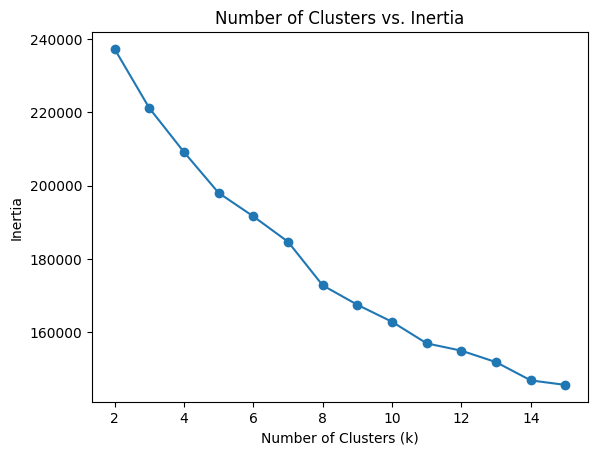

In [234]:
## Plot the Inertia Plot
# Turn the List into a Series of Plotting
inertia_series = pd.Series(inertia_values, index = range(2, 16))

# Plot the Data
inertia_series.plot(marker= 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia')
plt.show()

In [235]:
kmeans8 = KMeans(n_clusters= 8, n_init= 10, random_state= 42)
kmeans8.fit(df_scaled)

KMeans(n_init=10, random_state=42)

## Check the Number of Customers in each Cluster

In [236]:
from collections import Counter

Counter(kmeans8.labels_)

Counter({np.int32(6): 1902,
         np.int32(7): 1271,
         np.int32(4): 1164,
         np.int32(3): 2448,
         np.int32(0): 1119,
         np.int32(2): 1520,
         np.int32(5): 29,
         np.int32(1): 541})

## Create a Heat Map of the Cluster Centers and Interprete the Cluster

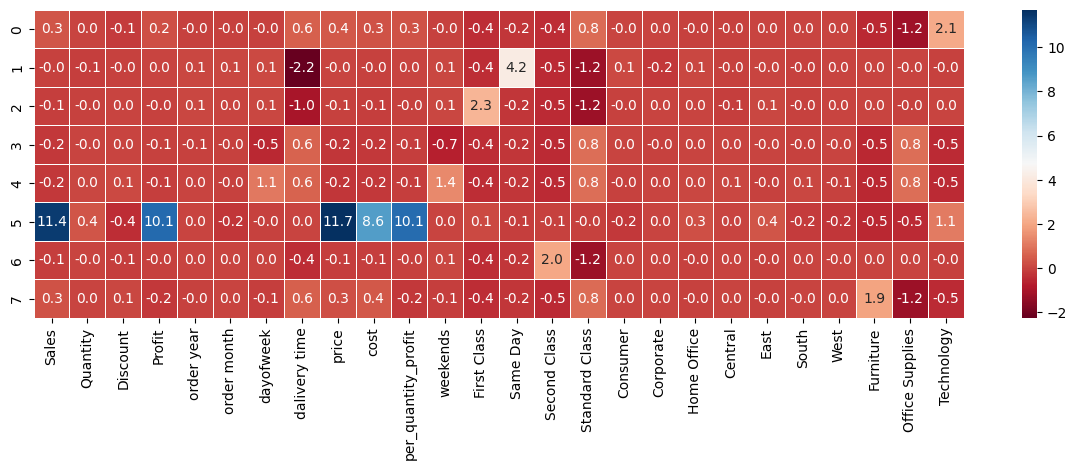

In [237]:
cluster_centers8 = pd.DataFrame(kmeans8.cluster_centers_, columns = df_scaled.columns)

plt.figure(figsize = (15, 4))
sns.heatmap(cluster_centers8, annot = True, cmap="RdBu", fmt=".1f", linewidths= 0.5);

## **Objective 3: Explore the Clusters and Make Recommendations**

Our Final Objective is to further Explore Our K-Means Clusters by looking at their Churn Rate and Country Breakdown, then make Recommendations for how to Cater to each Customer Segment.

In [238]:
data_final = pd.concat([data_subset, pd.Series(kmeans8.labels_, name = 'Cluster')], axis = 1)
data_final.head(10)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sales,Quantity,Discount,Profit,Cluster
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,261.9600,2,0.00,41.9136,6
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,731.9400,3,0.00,219.5820,6
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,14.6200,2,0.00,6.8714,6
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,957.5775,5,0.45,-383.0310,7
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,22.3680,2,0.20,2.5164,4
5,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,48.8600,7,0.00,14.1694,7
6,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,7.2800,4,0.00,1.9656,3
7,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,907.1520,6,0.20,90.7152,0
8,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,18.5040,3,0.20,5.7825,3
9,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,114.9000,5,0.00,34.4700,3


In [239]:
data_final_num = pd.concat([numberdata, pd.Series(kmeans8.labels_, name = 'Cluster')], axis = 1)
data_final_num.head(10)


,Sales,Quantity,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,...,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology,Cluster
0,261.9600,2,0.00,41.9136,2016,11,1,3,130.9800,220.0464,...,0,0,0,0,1,0,1,0,0,6
1,731.9400,3,0.00,219.5820,2016,11,1,3,243.9800,512.3580,...,0,0,0,0,1,0,1,0,0,6
2,14.6200,2,0.00,6.8714,2016,6,6,4,7.3100,7.7486,...,1,0,0,0,0,1,0,1,0,6
3,957.5775,5,0.45,-383.0310,2015,10,6,7,191.5155,1340.6085,...,0,0,0,0,1,0,1,0,0,7
4,22.3680,2,0.20,2.5164,2015,10,6,7,11.1840,19.8516,...,0,0,0,0,1,0,0,1,0,4
5,48.8600,7,0.00,14.1694,2014,6,0,5,6.9800,34.6906,...,0,0,0,0,0,1,1,0,0,7
6,7.2800,4,0.00,1.9656,2014,6,0,5,1.8200,5.3144,...,0,0,0,0,0,1,0,1,0,3
7,907.1520,6,0.20,90.7152,2014,6,0,5,151.1920,816.4368,...,0,0,0,0,0,1,0,0,1,0
8,18.5040,3,0.20,5.7825,2014,6,0,5,6.1680,12.7215,...,0,0,0,0,0,1,0,1,0,3
9,114.9000,5,0.00,34.4700,2014,6,0,5,22.9800,80.4300,...,0,0,0,0,0,1,0,1,0,3


In [240]:
data_final_num.groupby("Cluster").mean()

,Sales,Quantity,Discount,Profit,order year,order month,dayofweek,dalivery time,price,cost,...,Consumer,Corporate,Home Office,Central,East,South,West,Furniture,Office Supplies,Technology
Cluster,,,,,,,,,,,,,,,,,,,,,
0,443.015797,3.849866,0.130652,83.819877,2015.709562,7.777480,3.186774,4.936550,117.019184,359.195920,...,0.515639,0.309205,0.175156,0.222520,0.286863,0.163539,0.327078,0.000000,0.014298,0.985702
1,213.898974,3.608133,0.152033,32.352542,2015.809612,8.035120,3.473198,0.044362,60.292083,181.546432,...,0.585952,0.207024,0.207024,0.221811,0.284658,0.151571,0.341959,0.219963,0.602588,0.177449
2,182.703132,3.686842,0.164454,20.430444,2015.804605,7.845395,3.325000,2.180921,53.018831,162.272689,...,0.501974,0.315789,0.182237,0.194737,0.319737,0.152632,0.332895,0.213816,0.597368,0.188816
3,92.890217,3.775735,0.156536,15.332426,2015.665850,7.754493,2.049837,5.016748,25.645691,77.557791,...,0.523693,0.296160,0.180147,0.242647,0.283905,0.156046,0.317402,0.000000,1.000000,0.000000
4,102.029812,3.898625,0.180842,11.981668,2015.733677,7.759450,5.476804,5.025773,27.451837,90.048144,...,0.499141,0.304124,0.196735,0.259450,0.265464,0.182131,0.292955,0.000000,1.000000,0.000000
5,7340.600483,4.586207,0.068966,2405.118455,2015.724138,7.000000,3.103448,3.965517,1732.358793,4935.482028,...,0.413793,0.310345,0.275862,0.241379,0.448276,0.103448,0.206897,0.000000,0.379310,0.620690
6,182.409473,3.778654,0.138333,23.569335,2015.733438,7.815983,3.251840,3.232387,49.987348,158.840138,...,0.524711,0.313354,0.161935,0.237645,0.273922,0.169295,0.319138,0.218717,0.603049,0.178233
7,395.011718,3.861526,0.176129,-17.318780,2015.678993,7.860740,3.050354,4.957514,98.056755,412.330498,...,0.520063,0.313139,0.166798,0.238395,0.274587,0.160504,0.326515,0.992132,0.004721,0.003147


## Making Recommendations

| Segment | Main Features                                    | Likely Customer Type                  | Recommendation                                                                                                             |
| ------- | ------------------------------------------------ | ------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| 0       | Small sales, neutral delivery, low profit        | Small orders, low-margin              | Encourage upselling and cross-selling; offer bundle deals to increase order value.                                         |
| 1       | Heavy Second Class shipping                      | Occasional/low-value customers        | Focus on cost-effective shipping promotions; consider loyalty incentives to convert them into regular customers.           |
| 2       | Prefer First Class delivery                      | Moderate customers focused on speed   | Offer premium delivery options and time-sensitive promotions; emphasize fast shipping benefits.                            |
| 3       | Furniture focus, small quantity                  | Small furniture buyers                | Provide tailored recommendations and accessories; offer small-item discounts to increase frequency.                        |
| 4       | Furniture focus, higher delivery time            | Repeat furniture buyers               | Loyalty programs, bundle promotions, and personalized communication; incentivize repeat purchases despite longer delivery. |
| 5       | High sales, profit, technology + office supplies | Premium/high-value loyal customers    | Offer exclusive deals, early access to new products, and personalized service to maintain loyalty.                         |
| 6       | Medium orders, Second Class delivery             | Medium-value, cost-efficient shipping | Optimize shipping costs and highlight value-for-money offers; upsell moderately.                                           |
| 7       | Furniture focus, moderate delivery               | Mid-range occasional furniture buyers | Target with seasonal promotions and limited-time discounts; encourage medium-size orders.                                  |
